In [37]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DATA_MAINPATH = os.path.join(os.getcwd(), 'Data', 'ImgClassificationAugmentationData')
DATA_MAINPATH

'D:\\DataScince\\AI-ML\\ENVS\\computer_vision_cnn_cv2\\Data\\ImgClassificationAugmentationData'

In [57]:
train_datatset_path = os.path.join(DATA_MAINPATH, 'train')
test_datatset_path = os.path.join(DATA_MAINPATH, 'test')
pred_datatset_path = os.path.join(DATA_MAINPATH, 'pred')

In [18]:
test_datatset_path

'D:\\DataScince\\AI-ML\\ENVS\\computer_vision_cnn_cv2\\Data\\ImgClassificationAugmentationData\\test'

####  Creating a Training and Validation Datasets

In [24]:
data_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [49]:
train_set = train_data_generator.flow_from_directory(directory=train_datatset_path, target_size=(64,64), batch_size=32, class_mode='binary',shuffle=True)

Found 8005 images belonging to 2 classes.


In [50]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [55]:
class_names = os.listdir(train_datatset_path)
class_names

['cats', 'dogs']

In [52]:
test_set = train_data_generator.flow_from_directory(directory=test_datatset_path, target_size=(64,64), batch_size=32, class_mode='binary', shuffle=True)

Found 2023 images belonging to 2 classes.


In [136]:
pred_set = train_data_generator.flow_from_directory(directory=pred_datatset_path, target_size=(64,64), batch_size=32, class_mode='binary', shuffle=True)

Found 25000 images belonging to 2 classes.


#### Preview Sample

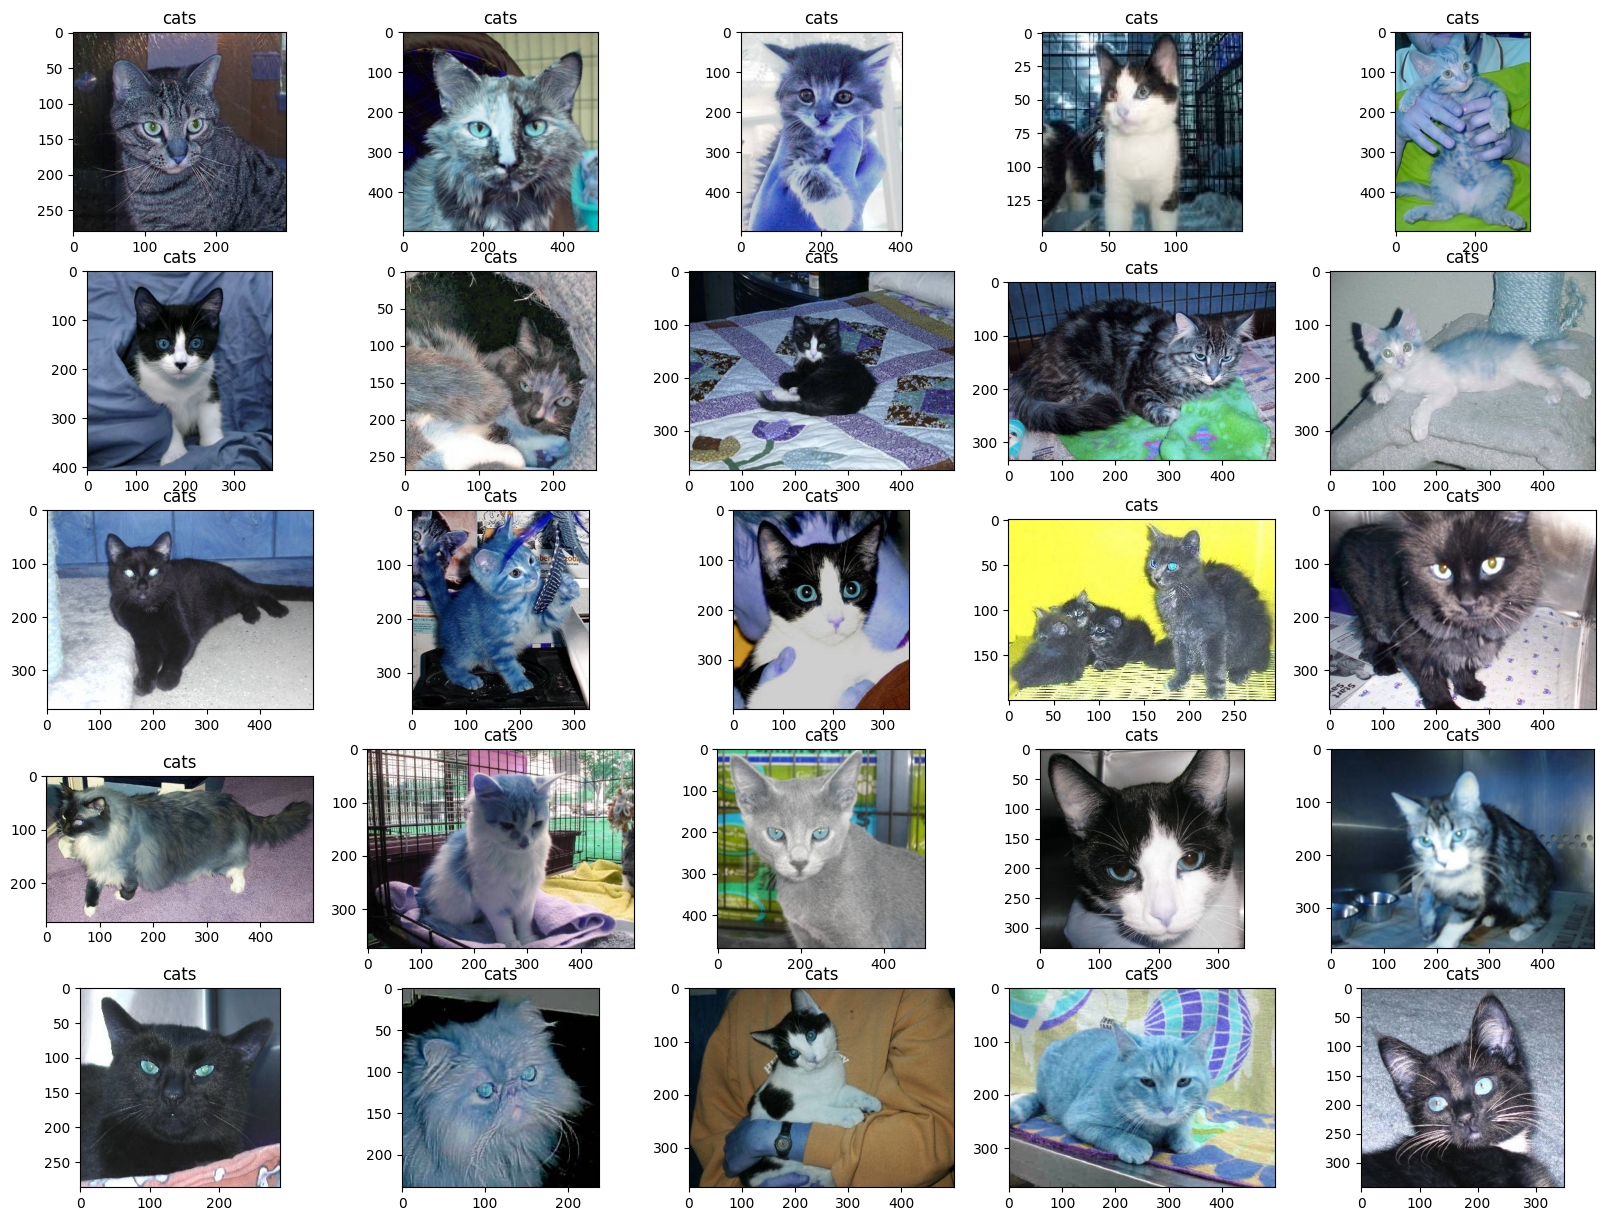

In [56]:
fig, axes = plt.subplots(5, 5, figsize=(20, 15))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    img = cv2.imread(train_set.filepaths[idx])
    ax.imshow(img)
    ax.set_title(class_names[train_set.classes[idx]])
plt.show()
# img = cv2.imread(train_set.filepaths[0])
# plt.imshow(img)

#### build the model

In [62]:
model = Sequential(
    [
        Conv2D(filters=32, kernel_size=(3, 3), input_shape = (64, 64, 3), activation='relu'),
        Conv2D(filters=32, kernel_size=(3, 3), input_shape = (64, 64, 3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(units=128, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3686528   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                      

In [65]:
history = model.fit(train_set, epochs= 10, validation_data=test_set)

Epoch 1/10
251/251 [==============================] - 30s 119ms/step - loss: 0.6001 - accuracy: 0.6753 - val_loss: 0.5997 - val_accuracy: 0.6841
Epoch 2/10
251/251 [==============================] - 30s 118ms/step - loss: 0.5644 - accuracy: 0.7051 - val_loss: 0.5981 - val_accuracy: 0.6866
Epoch 3/10
251/251 [==============================] - 30s 119ms/step - loss: 0.5246 - accuracy: 0.7388 - val_loss: 0.5558 - val_accuracy: 0.7301
Epoch 4/10
251/251 [==============================] - 30s 118ms/step - loss: 0.4884 - accuracy: 0.7594 - val_loss: 0.5405 - val_accuracy: 0.7430
Epoch 5/10
251/251 [==============================] - 34s 133ms/step - loss: 0.4616 - accuracy: 0.7744 - val_loss: 0.5575 - val_accuracy: 0.7232
Epoch 6/10
251/251 [==============================] - 33s 133ms/step - loss: 0.4428 - accuracy: 0.7883 - val_loss: 0.5214 - val_accuracy: 0.7603
Epoch 7/10
251/251 [==============================] - 30s 120ms/step - loss: 0.4112 - accuracy: 0.8090 - val_loss: 0.5524 - val_ac

<Axes: >

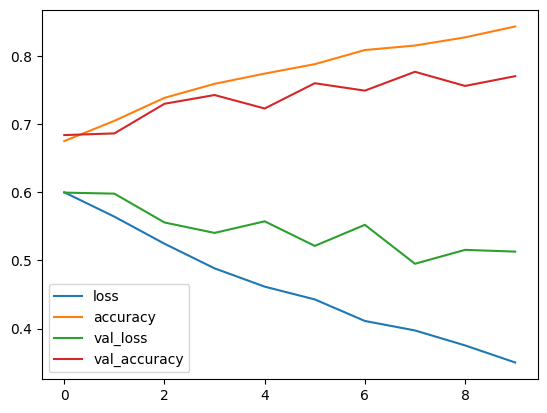

In [66]:
pd.DataFrame(history.history).plot()

In [69]:
#preds = model.predict(pred_set)

In [123]:
pred_img = cv2.imread(pred_set.filepaths[0])
pred_img = cv2.resize(pred_img, (64, 64))

In [124]:
pred_img.shape

(64, 64, 3)

In [125]:
pred_img = tf.expand_dims(pred_img, axis=0)

In [126]:
pred_img.shape

TensorShape([1, 64, 64, 3])

In [127]:
preds = model.predict(pred_img)

1/1 [==============================] - 0s 29ms/step


In [128]:
pred_img = np.reshape(pred_img, (64, 64, 3))
pred_img.shape

(64, 64, 3)

Text(0.5, 1.0, 'cats')

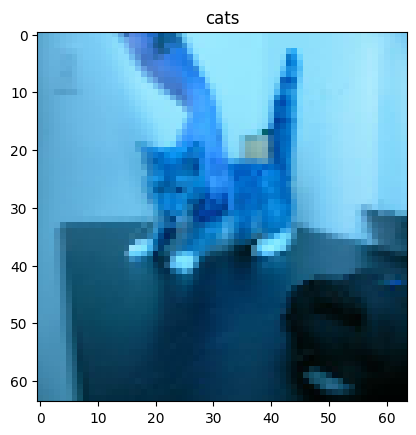

In [129]:
plt.imshow(pred_img)
plt.title(class_names[round(preds[0][0])])

1/1 [==============================] - 0s 23ms/step


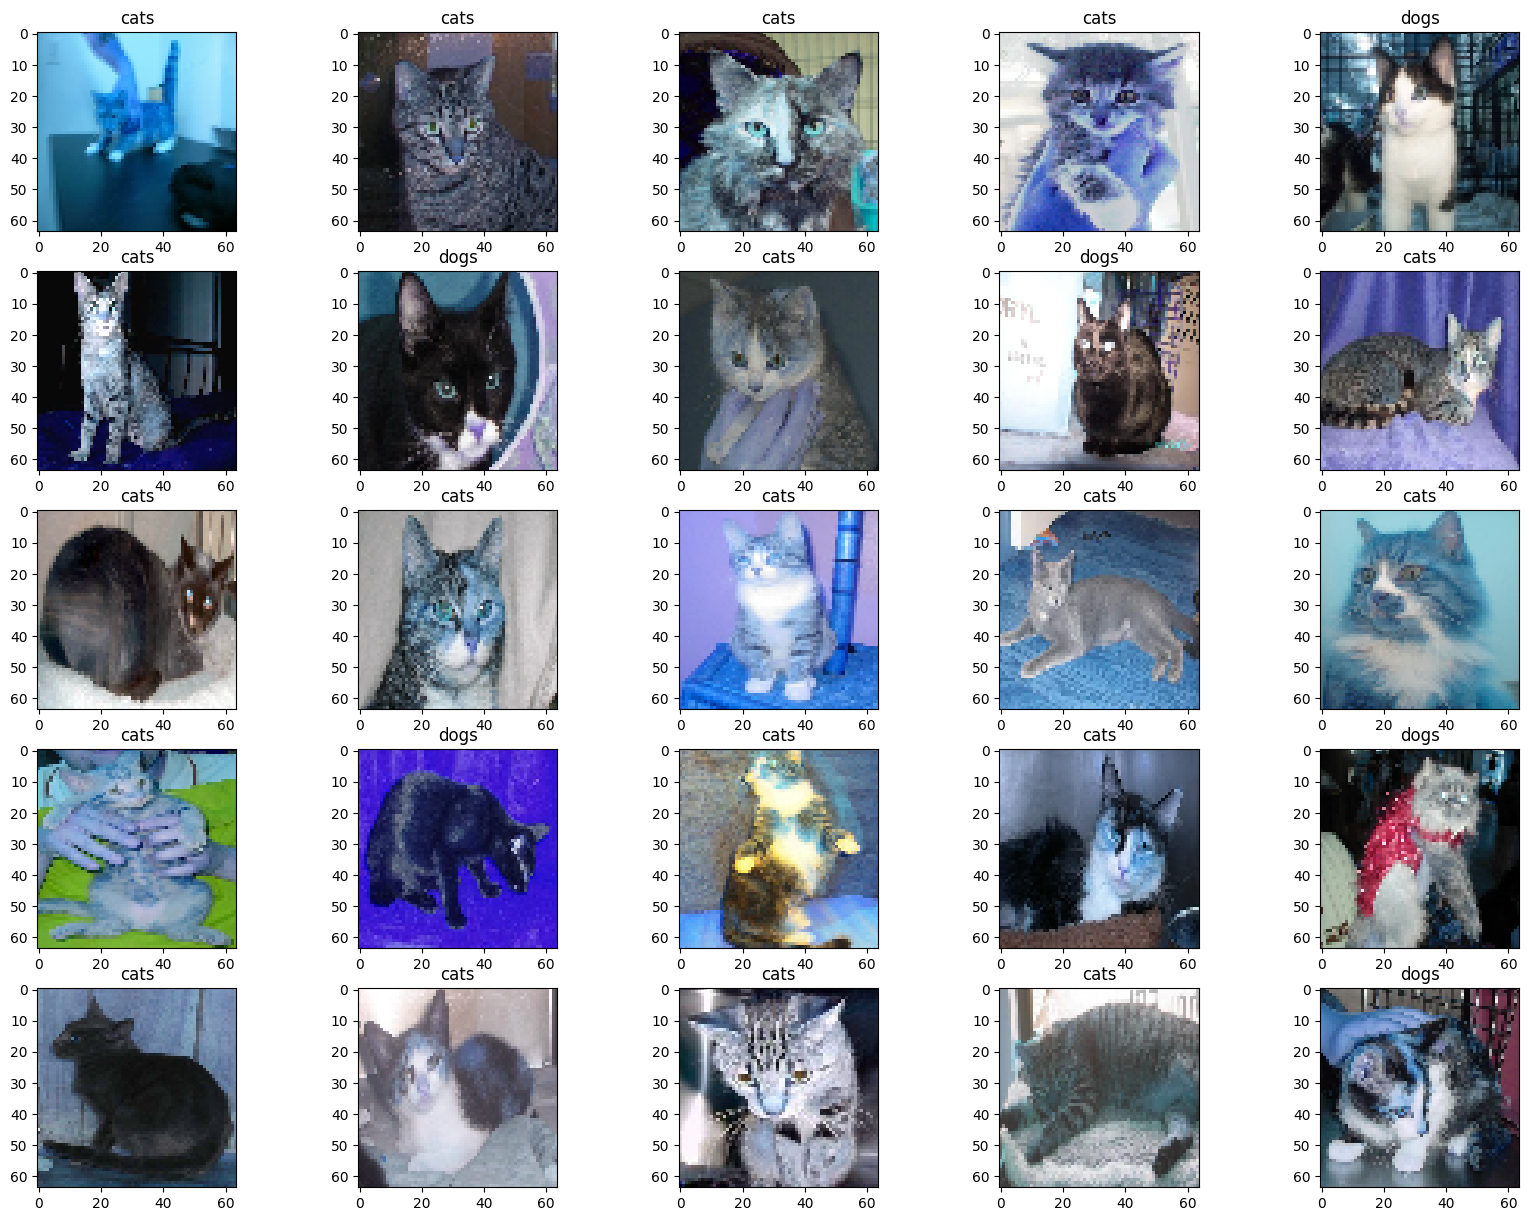

In [137]:
fig, axes = plt.subplots(5, 5, figsize=(20, 15))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    img = cv2.imread(pred_set.filepaths[idx])
    img = cv2.resize(img, (64, 64))
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    img = np.reshape(img, (64, 64, 3))
    ax.imshow(img)
    ax.set_title(class_names[round(pred[0][0])])
plt.show()
# img = cv2.imread(train_set.filepaths[0])
# plt.imshow(img)